In [1]:
import tensorflow_datasets as tfds

from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakNet
from nodes.core import layer

import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
random.seed(42)

inputlayer = layer()
foldiaklayer = layer()

for i in range(16):
    foldiaklayer.append(FoldiakNode(0.5))
for i in range(28*28):
    #I really need a way to make layers able to store multidimensional arrays; eventually, this would be an 8x8 (or larger)
    #Actually, lets do 28x28 so I can run MNIST through this
    inputlayer.append(InputNode(0))
    
network = FoldiakNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_layer_hebbian(inputlayer, foldiaklayer)
network.connect_self_antihebbian(foldiaklayer)

network.setup()

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",0.1)
network.setparam("l",10)

In [3]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))
for i in range(200):
    network.update()

In [4]:
ds = tfds.load('mnist', split='train', as_supervised=True)

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

outnum = 30
batch = 1000
numeach = 3
maxnum = outnum*batch*numeach
count=0

import time
t0 = time.clock()

for i in range(outnum):
    ds1 = ds.take(batch)

    for image, label in tfds.as_numpy(ds1):
        data = image.reshape((-1))/256.0
        datalist = data.tolist()
        for i in range(len(inputlayer.nodes)):
            inputlayer.nodes[i].setvalstored(datalist[i])
        for i in range(numeach):
            network.update()
    count+=1
    print(str(count*batch*numeach)+"/"+str(maxnum))
    ds.skip(batch)

t1 = time.clock()
print((t1-t0)/60/60)

3000/90000
6000/90000
9000/90000
12000/90000
15000/90000
18000/90000
21000/90000
24000/90000
27000/90000
30000/90000
33000/90000
36000/90000
39000/90000
42000/90000
45000/90000
48000/90000
51000/90000
54000/90000
57000/90000
60000/90000
63000/90000
66000/90000
69000/90000
72000/90000
75000/90000
78000/90000
81000/90000
84000/90000
87000/90000
90000/90000
0.8199686214166666


In [5]:
test = tfds.as_numpy(ds.take(100))

counts = []
for i in range(10):
    counts.append([])
    for j in range(16):
        counts[i].append(0)

for image, label in test:
    data = image.reshape((-1))/256.0
    datalist = data.tolist()
    for i in range(len(inputlayer.nodes)):
        inputlayer.nodes[i].setvalstored(datalist[i])
    for i in range(numeach):
        network.update()
    outlist = []
    for i in foldiaklayer.nodes:
        outlist.append(i.val)
    counts[label] = [a+b for a,b in zip(counts[label],outlist)]

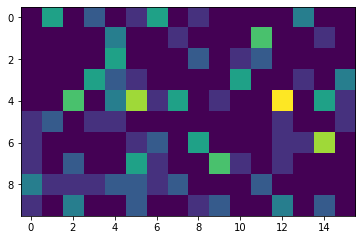

In [6]:
plt.imshow(np.array(counts))
plt.show()

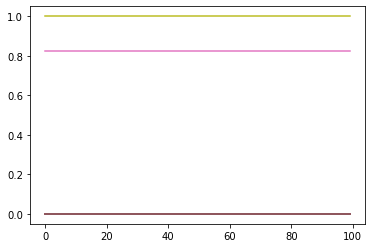

In [8]:
network.foldiaksetup()
plot = []
for i in foldiaklayer.nodes:
    plot.append([])
for i in range(100):
    for j in range(len(foldiaklayer.nodes)):
        plot[j].append(foldiaklayer.nodes[j].returnval())
    network.foldiakupdate()

for i in plot:
    plt.plot(i)
plt.show()